In [181]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
from numpy.polynomial import polynomial as P
#from mpl_toolkits.mplot3d.axes3d import mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [182]:
N=60
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5e-3*ec/(6.62e-34)
w_a=2*np.pi*1.5e-3*ec/(6.62e-34)
w_p=2*np.pi*1.5e-3*ec/(6.62e-34)
g=(1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.75*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=50:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.01
tlist=np.array(tlist)



In [183]:
sm=tensor(qeye(N),destroy(2))
a=tensor(destroy(N),qeye(2))
phi_c=fock(N,0)#state related to cavity field
phi_a=fock(2,0)#state related to dot
phi1=tensor(phi_c,phi_a)

No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)


In [184]:
n_the_exc=0
c_ops=[]

#cavity relaxation
rate=kappa*(1+n_the_exc)
if rate>0:
    c_ops.append(np.sqrt(rate)*a)

#cavity excitation if temperature is >0
rate=kappa*n_the_exc
if rate>0:
    c_ops.append(np.sqrt(rate)*a.dag())
    
#qubuit relaxation
rate=gamma
if rate>0:
    c_ops.append(np.sqrt(rate)*sm)
#c_ops=np.array(c_ops)

In [185]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        #print(s)
    return f

In [186]:
def d1_drive(tlist,args):

    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])

    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[0]))
    #print(s)
    return f

In [187]:
H_o=w_c*a.dag()*a + w_a*sm.dag()*sm + g*(a.dag()*sm+a*sm.dag())

H1=-0.50*(a.dag())
H2=-0.50*(a)
H=[H_o,[H1,d_drive],[H2,d1_drive]]

In [188]:
opt=Options(nsteps=100000000)
output=mesolve(H,phi1,tlist,[],[a.dag()*a,sm.dag()*sm],options=opt,progress_bar=True)

10.0%. Run time:   0.17s. Est. time left: 00:00:00:01
20.0%. Run time:   0.24s. Est. time left: 00:00:00:00
30.0%. Run time:   0.30s. Est. time left: 00:00:00:00
40.0%. Run time:   0.37s. Est. time left: 00:00:00:00
50.0%. Run time:   0.43s. Est. time left: 00:00:00:00
60.0%. Run time:   0.50s. Est. time left: 00:00:00:00
70.0%. Run time:   0.56s. Est. time left: 00:00:00:00
80.0%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.76s


In [189]:
qsave(output,'output CAD-1 E1.2')

result=qload('output CAD-1')

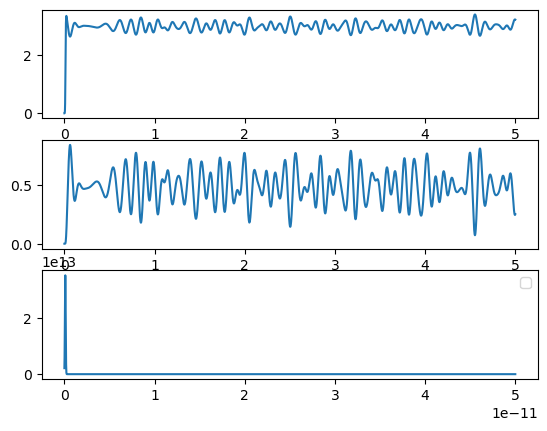

In [190]:
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)




 
n_c=output.expect[0]
n_a=output.expect[1]
fig=plt.figure()
axes=fig.add_subplot(311)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(312)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(313)
line_c=axes.plot(tlist,o)

plt.legend()
plt.show()

In [191]:
opt=Options(nsteps=100000000)
result1=mesolve(H,phi1,tlist,[],[],options=opt,progress_bar=True)

10.0%. Run time:   0.15s. Est. time left: 00:00:00:01
20.0%. Run time:   0.22s. Est. time left: 00:00:00:00
30.0%. Run time:   0.29s. Est. time left: 00:00:00:00
40.0%. Run time:   0.36s. Est. time left: 00:00:00:00
50.0%. Run time:   0.42s. Est. time left: 00:00:00:00
60.0%. Run time:   0.49s. Est. time left: 00:00:00:00
70.0%. Run time:   0.56s. Est. time left: 00:00:00:00
80.0%. Run time:   0.64s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.77s


In [192]:
qsave(result1,'output CAD-1 wignerE1.2')

result1=qload('output for fidelity')

In [193]:
fida=result1.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)
print(fida1[689])
k=(result1.states[732],0)
trr=[]
for i in range(0,len(fida1)):
    if fida1[i]>=0.79:
        trr.append(i)
        
print(trr)
        

0.2639256067904523
[]


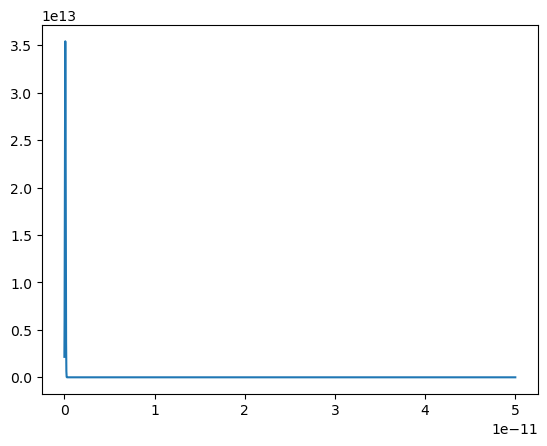

In [194]:
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)
    #print(g)
#print(o)
#print(len(tlist)
fig=plt.figure()
axes=fig.add_subplot(111)
line_c=axes.plot(tlist,o)

plt.show()   

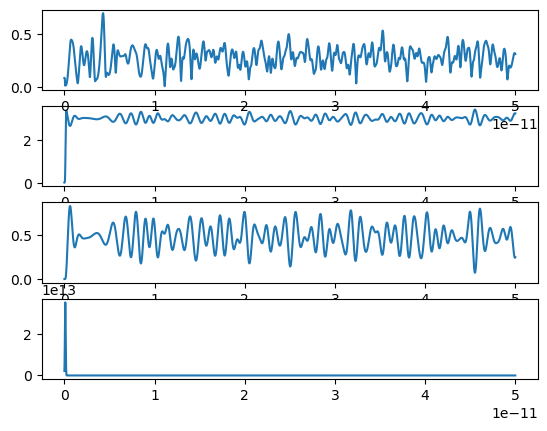

In [195]:

fig=plt.figure()
n_c=output.expect[0]
n_a=output.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,fida1,'')
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()

#print(len(er))        
#print(fida1)    
    


In [196]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM=[]
U=0   
while U<10:
    ggM.append(fida1[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1[i-5]+fida1[i-4]+fida1[i-3]+fida1[i-2]+fida1[i-1]+fida1[i])/6
    ggM.append(gg)
print(len(tlist),len(ggM)) 
#print(ggM)
#fida1[i-10]+fida1[i-9]+fida1[i-8]+fida1[i-7]+fida1[i-6]+fida1[i-5]+fida1[i-4]+fida1[i-3]+

[1.91203549e-03 2.28502346e+12 1.73997464e-08]
5001 5001


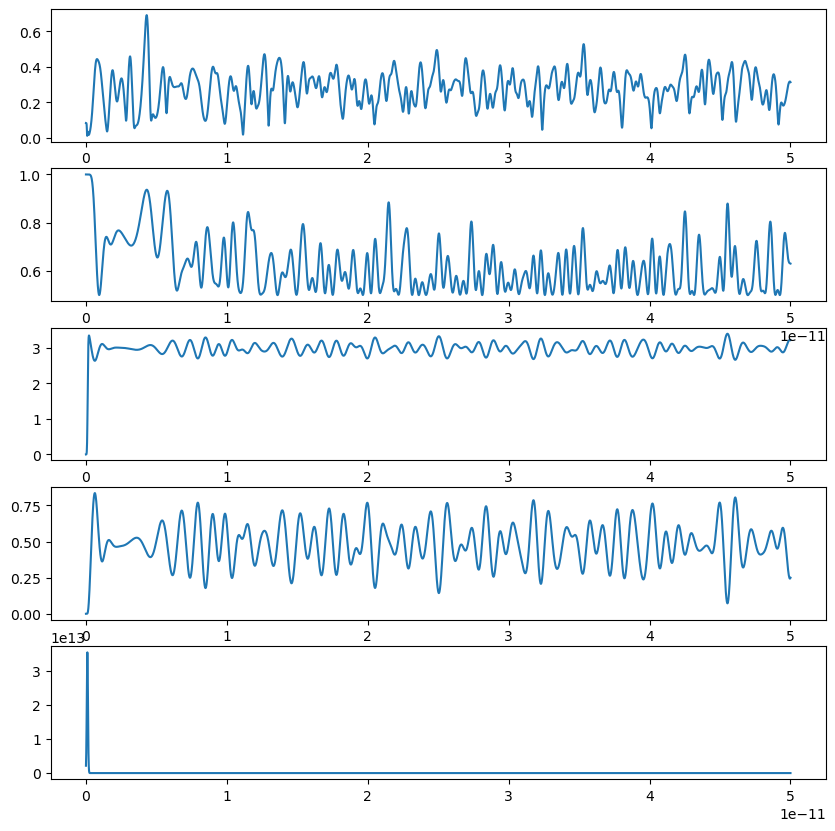

In [197]:
p=[]
for i  in range(0,len(tlist)):
    v=result1.states[i]
    v=ptrace(v,0)
    #v=np.array(v)
    r=v*v
    trace=r.tr()
    p.append(trace)
p=np.array(p)
fig=plt.figure(figsize=(10,10))
n_c=output.expect[0]
n_a=output.expect[1]
axes=fig.add_subplot(513)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(514)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(511)
line_c=axes.plot(tlist,ggM,'')
axes=fig.add_subplot(515)
line_c=axes.plot(tlist,o)
axes=fig.add_subplot(512)
line_c=axes.plot(tlist,p)
plt.show()


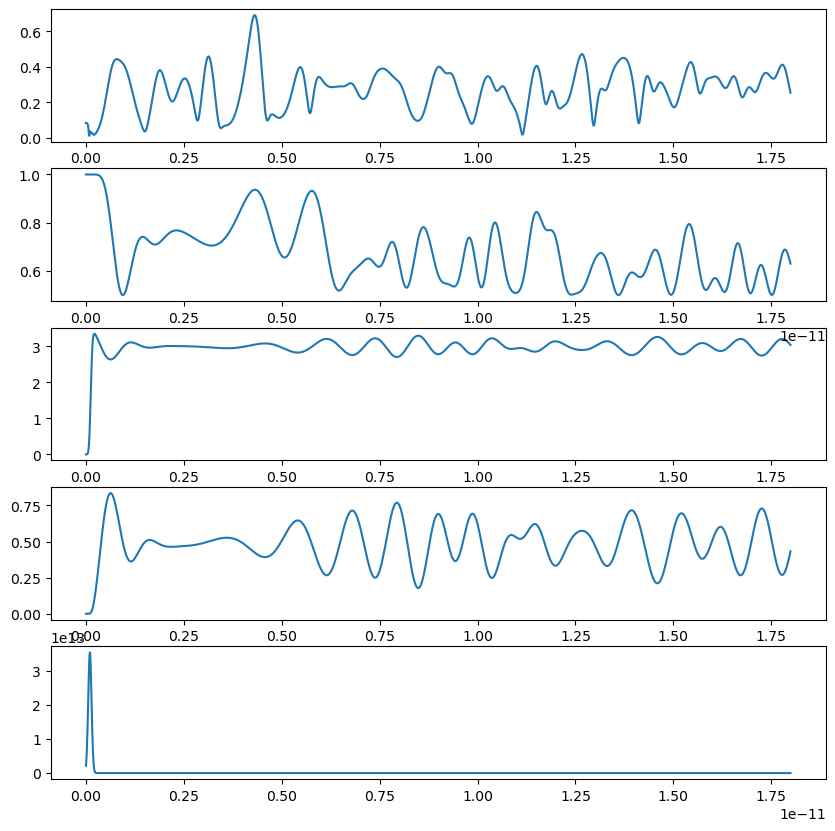

In [198]:
a,b,c,d,e,t=[],[],[],[],[],[]
for i in range(0,1800):
    a.append(ggM[i])
    b.append(p[i])
    c.append(n_c[i])
    d.append(n_a[i])
    e.append(o[i])
    t.append(tlist[i])

fig=plt.figure(figsize=(10,10))
axes=fig.add_subplot(513)
line_c=axes.plot(t,c,label='cavity ')
axes=fig.add_subplot(514)
line_a=axes.plot(t,d,label='dot excited state')
axes=fig.add_subplot(511)
line_c=axes.plot(t,a,'')
axes=fig.add_subplot(515)
line_c=axes.plot(t,e)
axes=fig.add_subplot(512)
line_c=axes.plot(t,b)
plt.show()


In [199]:
X=result1.states[429]
r=ptrace(X,0)
trace=r.tr()
print(trace)

0.9999999999999999


In [200]:
p=[]
for i in range(0,len(tlist)):
    Z=result1.states[i]
    r=ptrace(Z,0)
    trace=r.tr()
    print(trace**2)
    p.append(trace**2)

1.0
1.0
1.0
0.9999999999999993
0.9999999999999998
1.0000000000000004
1.0000000000000004
1.0000000000000004
1.0
1.0
1.0
1.0
1.0
0.9999999999999996
1.0
1.0
1.0000000000000004
0.9999999999999998
0.9999999999999991
0.9999999999999996
1.0000000000000004
1.0000000000000009
1.0
0.9999999999999998
1.0000000000000013
0.9999999999999993
1.0
1.0000000000000004
1.0
1.0000000000000004
1.0000000000000004
0.9999999999999998
1.0000000000000004
1.0
1.0000000000000004
1.0
0.9999999999999996
1.0000000000000004
0.9999999999999996
0.9999999999999998
1.0
0.9999999999999996
0.9999999999999996
1.0
0.9999999999999996
0.9999999999999998
1.0
1.0
0.9999999999999991
0.9999999999999996
0.9999999999999991
0.9999999999999996
1.0
1.0000000000000004
1.0000000000000009
0.9999999999999996
1.0
0.9999999999999998
1.0000000000000004
1.0
0.9999999999999998
0.9999999999999996
0.9999999999999993
0.9999999999999998
1.0000000000000009
0.9999999999999991
1.0000000000000004
1.0
1.0000000000000009
0.9999999999999993
0.9999999999999

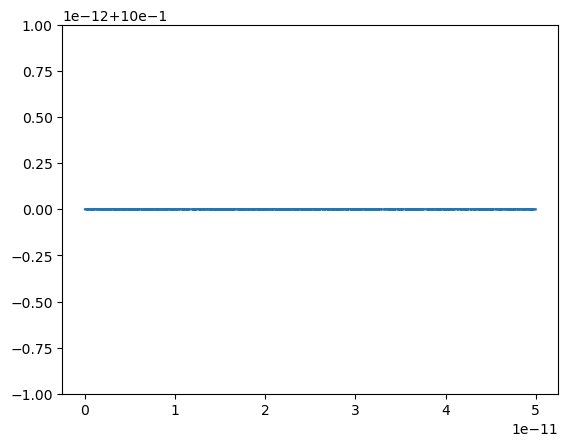

In [201]:
p=np.array(p)
p=p.T
fig=plt.figure()
plot=fig.add_subplot(111)
line=plot.plot(tlist,p)


In [202]:
print(p)
print(tlist)

[1. 1. 1. ... 1. 1. 1.]
[0.000e+00 1.000e-14 2.000e-14 ... 4.998e-11 4.999e-11 5.000e-11]


In [204]:
from scipy.linalg import eig
v=result1.states[429]
v=ptrace(v,0)
w,v=eig(v)
psi=v[:,np.argmax(w)]
print(psi)
psi=np.array(psi)
for i in range(0,len(tlist)):

    v=result1.states[429]
    v=ptrace(v,0)
    w,v=eig(v)
    psi=v[:,np.argmax(w)]
    

[ 1.48574737e-01+3.62282620e-02j  4.43537429e-02-3.69059881e-01j
  6.11463744e-01+0.00000000e+00j  6.29868362e-03+5.21925676e-02j
  5.52905460e-01-1.34809171e-01j  5.71552516e-04+1.43329555e-03j
  2.89715331e-01-1.50213734e-01j -7.23648277e-02-1.06287238e-01j
  5.79418553e-02-5.05683692e-02j -6.61837684e-02-5.96864493e-02j
 -1.39962644e-02+1.98417246e-02j -1.16233318e-02-6.27140716e-03j
 -5.43951208e-03+1.38088054e-02j  5.45255672e-03+1.42470577e-03j
 -1.86634840e-05+1.28414606e-04j  1.36250222e-03+2.33085354e-05j
 -8.39488565e-05-8.13850579e-04j -2.26757325e-04+5.14632597e-05j
 -3.94931489e-06-1.16087970e-05j -4.43613338e-05+2.19682210e-05j
  1.53990267e-05+2.34811587e-05j  6.79487832e-06-5.74148609e-06j
 -7.02627494e-07-6.41234862e-07j  4.56248095e-07-6.14895625e-07j
 -5.12642876e-07-2.89828630e-07j -9.14739585e-08+2.20896189e-07j
  5.83163186e-08+1.60562047e-08j  4.57275361e-10-4.13970813e-09j
  5.10078488e-09+2.50055900e-10j -2.67602434e-10-3.37024003e-09j
 -1.27477919e-09+2.630397

In [205]:
f=n_c[429].real/((psi.real).dot(np.conjugate(psi.real)))

In [206]:
print(f)

3.80327465572295


In [ ]:
v=result1.states[0]
v=ptrace(v,0)
#print(v*v)
r=v*v
trace=r.tr()
print(trace)


1.0


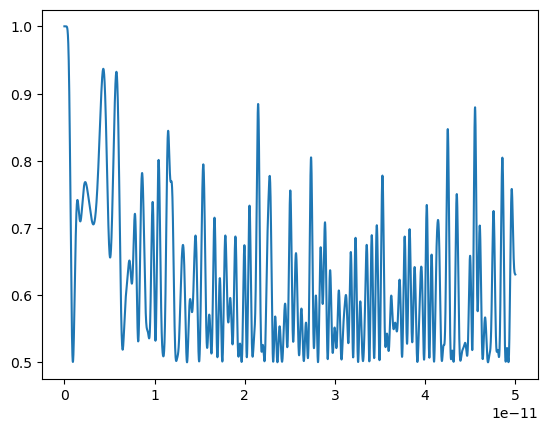

In [207]:
p=[]
for i  in range(0,len(tlist)):
    v=result1.states[i]
    v=ptrace(v,0)
    #v=np.array(v)
    r=v*v
    trace=r.tr()
    p.append(trace)
p=np.array(p)
fig=plt.figure()
plot=fig.add_subplot(111)
line=plot.plot(tlist,p)